# check distribution difference between CESM and Real world

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import sys
import tensorflow as tf
from tensorflow import keras
from pyseaflux import fCO2_to_pCO2
import os

sys.path.insert(0, '../../src')

from utils import df_to_xarray,read_xarray, custom_rmse

sys.path.insert(0, '../../src/preprocess')
from data_preprocess import preprocess_image_reduced,preprocess_images_nfp, inverse_scale_frame
from data_preprocess import preprocess_images, inverse_scale_image, preprocess_image_reduced

In [61]:
dist_map = pd.read_csv("../../src/dist_map.csv",header=None).to_numpy()
dist_map = np.roll(np.fliplr(dist_map),180)
dist_map = np.repeat(dist_map[np.newaxis, :, : ], 480, axis=0)

def custom_rmse2(y_true, y_pred):
    """
    custom_rmse(y_true, y_pred)
    calculates root square mean value with focusing only on the ocean
    + difference between sss
    """
    idx  = tf.not_equal(y_true, 0.0)
    idx2  = tf.equal(y_true, 0.0)
    
    y_pred1 = tf.boolean_mask(y_pred,idx)
    y_true1 = tf.boolean_mask(y_true,idx)
    y_true1 = tf.cast(y_true1, y_pred.dtype)
    
    return rmse1

def xco2_preprocess(data):
    output = []
    min_xco2 = np.min(data)
    max_xco2=np.max(data)
    new_min=0
    new_max=255
    
    for d in data:
        num = (d-min_xco2)*(new_max-new_min)/(max_xco2-min_xco2)+new_min
        output.append(num)
        
    return output

In [94]:
np.array(real_data.sst.data).shape

(480, 180, 360)

## Real World Data

In [148]:
def pco2_socat_preprocess(arr):
    nans=np.isnan(arr)
    min_val=arr[~nans].min()
    arr[nans]= 0
    arr[arr>1000]=0
    return arr

dir_name = "../../data/real_world/MERGED-DATA_1x1_mon_198201-202112.nc"
real_data = xr.open_dataset(f'{dir_name}')
pco2_converted = fCO2_to_pCO2(real_data.fco2_ave_unwtd.data,real_data.sst.data)

In [149]:
# Real World X
chl_images = preprocess_image_reduced(real_data.chl.data)
sss_images = preprocess_image_reduced(real_data.sss.data)
sst_images = preprocess_image_reduced(real_data.sst.data)
dist_map = preprocess_image_reduced(dist_map)
xco2_images = xco2_preprocess(real_data.atm_pco2_uatm.data)

# Real World y
pco2_socat_images = pco2_socat_preprocess(pco2_converted)

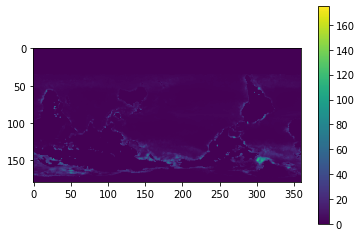

In [144]:
#CHL
img=plt.imshow(chl_images[400])
plt.colorbar(img)


(array([1.5399881e+07, 1.0412400e+06, 3.1585800e+05, 1.5540400e+05,
        7.9331000e+04, 4.6549000e+04, 2.8092000e+04, 1.7879000e+04,
        1.0591000e+04, 6.3770000e+03, 4.4100000e+03, 2.9850000e+03,
        2.3960000e+03, 1.7500000e+03, 1.0950000e+03, 6.8400000e+02,
        4.3800000e+02, 4.1800000e+02, 3.8700000e+02, 1.6300000e+02,
        1.4000000e+02, 2.4000000e+01, 8.7000000e+01, 6.0000000e+00,
        8.0000000e+00, 4.3000000e+01, 4.1000000e+01, 4.1000000e+01,
        1.0000000e+00, 4.1000000e+01]),
 array([1.10307507e-01, 8.60663033e+00, 1.71029530e+01, 2.55992775e+01,
        3.40956001e+01, 4.25919228e+01, 5.10882454e+01, 5.95845680e+01,
        6.80808945e+01, 7.65772171e+01, 8.50735397e+01, 9.35698624e+01,
        1.02066185e+02, 1.10562508e+02, 1.19058830e+02, 1.27555153e+02,
        1.36051483e+02, 1.44547806e+02, 1.53044128e+02, 1.61540451e+02,
        1.70036774e+02, 1.78533096e+02, 1.87029419e+02, 1.95525742e+02,
        2.04022064e+02, 2.12518387e+02, 2.21014709e+

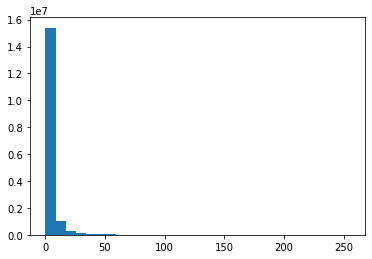

In [145]:
plt.hist(chl_images[chl_images!=0],bins=30)

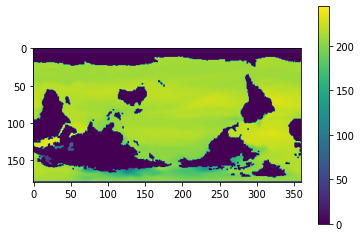

In [68]:
#SSS
img=plt.imshow(sss_images[400])
plt.colorbar(img)

(array([1.464960e+06, 0.000000e+00, 2.400000e+01, 5.162000e+03,
        1.354200e+04, 1.003000e+04, 4.152000e+03, 5.115000e+03,
        9.189000e+03, 1.395600e+04, 3.769000e+03, 5.892000e+03,
        1.394600e+04, 2.026500e+04, 1.892600e+04, 2.550700e+04,
        3.500800e+04, 5.754200e+04, 9.703000e+04, 1.607820e+05,
        2.739930e+05, 4.960660e+05, 9.157620e+05, 1.657173e+06,
        8.052162e+06, 6.741246e+06, 1.883910e+06, 1.494180e+05,
        5.898300e+04, 4.090000e+03]),
 array([  6.00187478,  14.30181229,  22.60174979,  30.9016873 ,
         39.20162481,  47.50156232,  55.80149982,  64.10143733,
         72.40137484,  80.70131234,  89.00124985,  97.30118736,
        105.60112487, 113.90106237, 122.20099988, 130.50093739,
        138.8008749 , 147.1008124 , 155.40074991, 163.70068742,
        172.00062493, 180.30056243, 188.60049994, 196.90043745,
        205.20037496, 213.50031246, 221.80024997, 230.10018748,
        238.40012499, 246.70006249, 255.        ]),
 <BarContainer

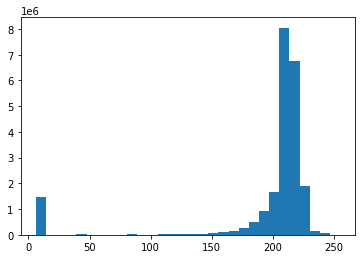

In [75]:
plt.hist(sss_images[sss_images!=0],bins=30)

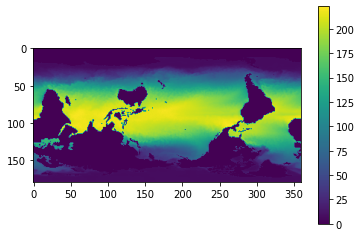

In [78]:
#SST
img=plt.imshow(sst_images[400])
plt.colorbar(img)

(array([4.101794e+06, 7.623710e+05, 6.195650e+05, 5.153010e+05,
        4.776130e+05, 4.845670e+05, 4.930220e+05, 4.899250e+05,
        4.734210e+05, 4.488380e+05, 4.243230e+05, 4.164200e+05,
        4.164700e+05, 4.261860e+05, 4.554610e+05, 4.888270e+05,
        5.286670e+05, 5.629480e+05, 6.091610e+05, 6.758070e+05,
        7.756540e+05, 9.649920e+05, 1.272402e+06, 1.598382e+06,
        1.495757e+06, 3.593120e+05, 8.063000e+03, 1.448000e+03,
        4.450000e+02, 5.800000e+01]),
 array([  6.59562338,  14.87576926,  23.15591515,  31.43606104,
         39.71620693,  47.99635281,  56.2764987 ,  64.55664459,
         72.83679048,  81.11693636,  89.39708225,  97.67722814,
        105.95737403, 114.23751991, 122.5176658 , 130.79781169,
        139.07795758, 147.35810346, 155.63824935, 163.91839524,
        172.19854113, 180.47868701, 188.7588329 , 197.03897879,
        205.31912468, 213.59927056, 221.87941645, 230.15956234,
        238.43970823, 246.71985411, 255.        ]),
 <BarContainer

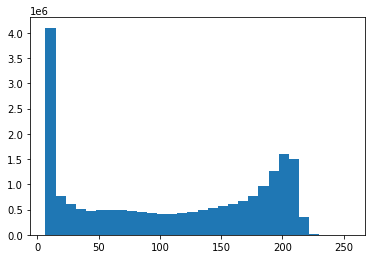

In [79]:
plt.hist(sst_images[sst_images!=0],bins=30)

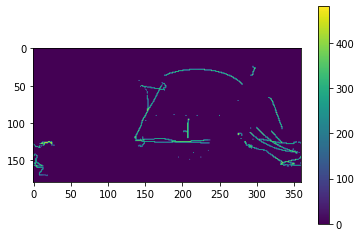

In [150]:
img=plt.imshow(pco2_socat_images[400])
plt.colorbar(img)

(array([2.0000e+00, 7.0000e+00, 2.1000e+01, 5.6000e+01, 8.6000e+01,
        1.7300e+02, 3.0600e+02, 4.1000e+02, 6.4600e+02, 9.9700e+02,
        1.4670e+03, 2.0590e+03, 3.3200e+03, 5.2700e+03, 1.1782e+04,
        2.5753e+04, 4.9306e+04, 6.6154e+04, 6.4284e+04, 4.7157e+04,
        2.6311e+04, 1.1970e+04, 5.4110e+03, 2.9270e+03, 1.6990e+03,
        9.4800e+02, 4.4500e+02, 2.6100e+02, 1.3200e+02, 8.5000e+01,
        5.5000e+01, 4.2000e+01, 3.4000e+01, 1.4000e+01, 8.0000e+00,
        8.0000e+00, 1.0000e+01, 6.0000e+00, 6.0000e+00, 3.0000e+00,
        2.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([ 44.66965724,  62.36448851,  80.05931978,  97.75415105,
        115.44898232, 133.14381359, 150.83864486, 168.53347613,
        186.2283074 , 203.92313867, 221.61796994, 239.31280121,
        257.00763248, 274.70246375, 292.39729502, 310.09212629,
        327.78695756, 345.48178883, 363.1766201 , 380.87145137

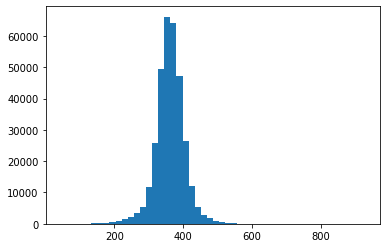

In [152]:
pco2_socat_non = pco2_socat_images[pco2_socat_images!=0]
#pco2_socat_non = pco2_socat_non[ ~ np.isnan(pco2_socat_non)]

plt.hist(pco2_socat_non,bins=50)

## CESM

In [47]:
def pco2_socat_preprocess(arr):
    nans=np.isnan(arr)
    min_val=arr[~nans].min()
    arr[nans]=min_val
    return arr

In [48]:
dir_name = "../../data/member_001"
chl,mld,sss,sst,u10,xco2,icefrac,patm,pco2 = read_xarray(dir_name,num = "001")

In [49]:
cesm_chl_images = preprocess_image_reduced(chl.Chl.data)
cesm_sss_images = preprocess_image_reduced(sss.SSS.data)
cesm_sst_images = preprocess_image_reduced(sst.SST.data)
cesm_xco2_images = preprocess_image_reduced(xco2.XCO2.data,xco2=True)

cesm_pco2_socat_images = pco2_socat_preprocess(pco2.pCO2_socat.data)
cesm_pco2 = preprocess_image_reduced(pco2.pCO2.data)


In [111]:
xco2

<xarray.Dataset>
Dimensions:    (time: 421, bnds: 2)
Coordinates:
    TLONG      float64 ...
    TLAT       float64 ...
  * time       (time) object 1982-02-01 00:00:00 ... 2017-02-01 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    XCO2       (time) float32 340.8 341.0 341.1 341.2 ... 406.7 407.0 407.2
Attributes: (12/16)
    CDI:                       Climate Data Interface version 1.7.2 (http://m...
    history:                   Thu Apr 05 13:33:27 2018: cdo seltimestep,1/42...
    source:                    CCSM POP2, the CCSM Ocean Component
    Conventions:               CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netc...
    title:                     b.e11.B20TRC5CNBDRD.f09_g16.001
    contents:                  Diagnostic and Prognostic Variables
    ...                        ...
    nsteps_total:              750
    tavg_sum:                  2592000.0
    tavg_sum_qflux:            2592000.0
    nco_openmp_thread_number:  1
    NCO:                       4.6.9
    CDO:                       Climate Data Operators version 1.7.2 (http://m...

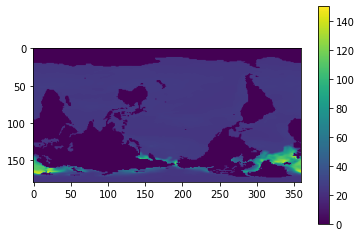

In [66]:
#Chl 

img=plt.imshow(cesm_chl_images[400])
plt.colorbar(img)


(array([3.2363060e+06, 1.2741386e+07, 3.1051400e+05, 2.0011100e+05,
        1.4258900e+05, 1.1409800e+05, 9.3138000e+04, 8.2283000e+04,
        7.4160000e+04, 6.3025000e+04, 5.5275000e+04, 4.8946000e+04,
        4.3990000e+04, 3.3786000e+04, 2.4713000e+04, 1.5133000e+04,
        5.2030000e+03, 1.7500000e+03, 1.1090000e+03, 7.3500000e+02,
        5.1800000e+02, 4.4700000e+02, 4.3000000e+02, 3.5500000e+02,
        1.9000000e+02, 1.2600000e+02, 8.0000000e+01, 4.0000000e+01,
        2.3000000e+01, 1.1000000e+01]),
 array([ 15.858715,  23.830091,  31.801468,  39.772842,  47.74422 ,
         55.715595,  63.686974,  71.65835 ,  79.62972 ,  87.6011  ,
         95.57248 , 103.54385 , 111.51523 , 119.4866  , 127.457985,
        135.42935 , 143.40073 , 151.37212 , 159.34349 , 167.31487 ,
        175.28624 , 183.25761 , 191.22899 , 199.20036 , 207.17174 ,
        215.14311 , 223.1145  , 231.08588 , 239.05725 , 247.02863 ,
        255.      ], dtype=float32),
 <BarContainer object of 30 artists>)

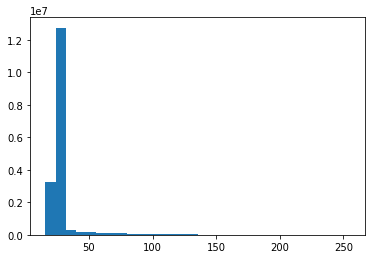

In [77]:
plt.hist(cesm_chl_images[cesm_chl_images!=0],bins=30)

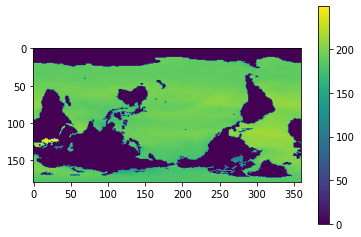

In [69]:
#SSS
img=plt.imshow(cesm_sss_images[400])
plt.colorbar(img)

(array([1.473500e+04, 2.000000e+00, 8.000000e+00, 1.600000e+01,
        6.600000e+01, 1.480000e+02, 2.340000e+02, 3.010000e+02,
        3.930000e+02, 7.110000e+02, 1.551000e+03, 1.700500e+04,
        1.118900e+04, 1.877300e+04, 2.043800e+04, 2.000200e+04,
        2.431500e+04, 4.711700e+04, 9.886500e+04, 2.744060e+05,
        1.232293e+06, 4.013320e+06, 7.529269e+06, 2.919242e+06,
        9.137680e+05, 4.558000e+04, 2.533100e+04, 1.006400e+04,
        3.586400e+04, 1.546400e+04]),
 array([  6.8534203,  15.124972 ,  23.396524 ,  31.668077 ,  39.93963  ,
         48.21118  ,  56.482735 ,  64.75429  ,  73.02584  ,  81.297386 ,
         89.56894  ,  97.84049  , 106.112045 , 114.3836   , 122.65515  ,
        130.9267   , 139.19826  , 147.4698   , 155.74136  , 164.01291  ,
        172.28447  , 180.55602  , 188.82756  , 197.09912  , 205.37067  ,
        213.64223  , 221.91377  , 230.18533  , 238.45688  , 246.72844  ,
        254.99998  ], dtype=float32),
 <BarContainer object of 30 artists>)

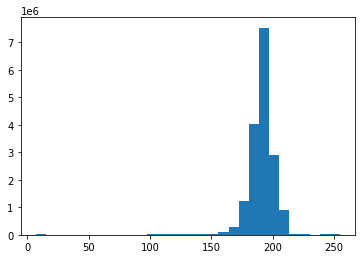

In [76]:
plt.hist(cesm_sss_images[cesm_sss_images!=0],bins=30)

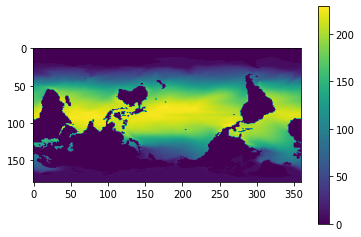

In [80]:
#SST
img=plt.imshow(cesm_sst_images[400])
plt.colorbar(img)

(array([3.459511e+06, 3.698530e+05, 3.857810e+05, 4.073680e+05,
        4.237460e+05, 4.474990e+05, 4.381160e+05, 4.170790e+05,
        4.037930e+05, 3.944150e+05, 3.732280e+05, 3.555600e+05,
        3.506570e+05, 3.563750e+05, 3.736570e+05, 3.969800e+05,
        4.329060e+05, 4.710750e+05, 5.145090e+05, 5.682600e+05,
        6.265270e+05, 7.303770e+05, 9.235360e+05, 1.101415e+06,
        1.186008e+06, 1.059701e+06, 3.171470e+05, 4.674000e+03,
        6.510000e+02, 6.600000e+01]),
 array([  6.889586,  15.159932,  23.430279,  31.700626,  39.970974,
         48.241318,  56.511665,  64.78201 ,  73.05236 ,  81.32271 ,
         89.593056,  97.863396, 106.13374 , 114.40409 , 122.67444 ,
        130.94478 , 139.21513 , 147.48547 , 155.75583 , 164.02617 ,
        172.29652 , 180.56686 , 188.83722 , 197.10756 , 205.3779  ,
        213.64825 , 221.9186  , 230.18895 , 238.45929 , 246.72964 ,
        254.99998 ], dtype=float32),
 <BarContainer object of 30 artists>)

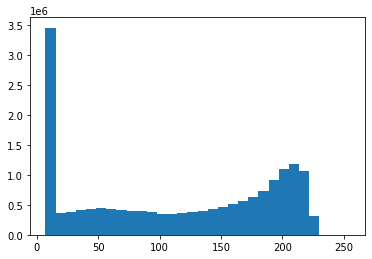

In [81]:
plt.hist(cesm_sst_images[cesm_sst_images!=0],bins=30)

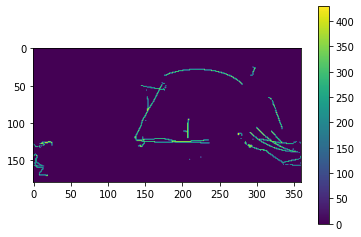

In [52]:
img=plt.imshow(cesm_pco2_socat_images[400])
plt.colorbar(img)

(array([2.6000e+01, 1.0800e+02, 1.7300e+02, 2.5800e+02, 2.7000e+02,
        3.0500e+02, 2.7500e+02, 2.7300e+02, 3.0200e+02, 5.1500e+02,
        1.2150e+03, 1.1220e+03, 1.6480e+03, 2.1910e+03, 2.3960e+03,
        2.8480e+03, 3.4100e+03, 4.5150e+03, 6.6740e+03, 1.0280e+04,
        1.6075e+04, 2.3876e+04, 3.0490e+04, 3.1612e+04, 2.9561e+04,
        2.4551e+04, 1.8711e+04, 1.2901e+04, 7.7460e+03, 4.4450e+03,
        2.2820e+03, 1.3680e+03, 8.8700e+02, 5.9300e+02, 4.4600e+02,
        4.5000e+02, 3.0400e+02, 1.7100e+02, 9.8000e+01, 7.2000e+01,
        5.4000e+01, 2.7000e+01, 1.5000e+01, 1.9000e+01, 1.3000e+01,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([116.16551575, 126.54628751, 136.92705927, 147.30783103,
        157.68860278, 168.06937454, 178.4501463 , 188.83091806,
        199.21168982, 209.59246158, 219.97323333, 230.35400509,
        240.73477685, 251.11554861, 261.49632037, 271.87709213,
        282.25786389, 292.63863564, 303.0194074 , 313.40017916

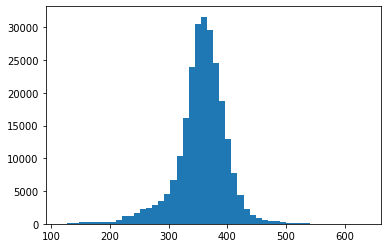

In [50]:
cesm_pco2_socat_non = cesm_pco2_socat_images[cesm_pco2_socat_images!=0]
cesm_pco2_socat_non = cesm_pco2_socat_non[ ~ np.isnan(cesm_pco2_socat_non)]

plt.hist(cesm_pco2_socat_non,bins=50)

(array([7.970000e+02, 3.723000e+03, 6.023000e+03, 7.241000e+03,
        1.129700e+04, 2.483100e+04, 7.497700e+04, 1.336290e+05,
        1.836380e+05, 2.140000e+05, 2.470270e+05, 3.023320e+05,
        4.290930e+05, 7.848950e+05, 1.540191e+06, 2.610085e+06,
        3.114004e+06, 2.784178e+06, 2.061583e+06, 1.289920e+06,
        6.417560e+05, 3.289040e+05, 1.824840e+05, 1.091290e+05,
        6.833200e+04, 4.396900e+04, 2.826000e+04, 1.806500e+04,
        1.196400e+04, 7.584000e+03, 5.109000e+03, 4.016000e+03,
        3.039000e+03, 2.630000e+03, 2.128000e+03, 1.801000e+03,
        1.642000e+03, 1.384000e+03, 1.153000e+03, 9.900000e+02,
        8.000000e+02, 6.040000e+02, 4.470000e+02, 3.390000e+02,
        2.260000e+02, 1.350000e+02, 8.400000e+01, 2.400000e+01,
        6.000000e+00, 2.000000e+00]),
 array([  0.35227648,   5.44523095,  10.53818542,  15.63113989,
         20.72409436,  25.81704884,  30.91000331,  36.00295778,
         41.09591225,  46.18886672,  51.28182119,  56.37477566,
  

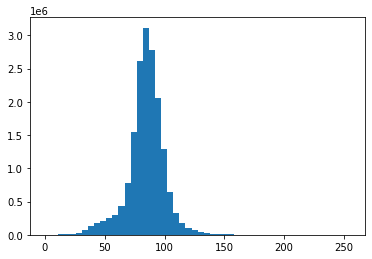

In [23]:
cesm_pco2_non = cesm_pco2[cesm_pco2!=0]
cesm_pco2_non = cesm_pco2_non[ ~ np.isnan(cesm_pco2_non)]

plt.hist(cesm_pco2_non,bins=50)

## MPI

In [82]:
mpi_data_path = "../../data/mpi_001"


def read_xarray_mpi(dir_name="",num="006"):
    '''
     read_xarray(dir)name) opens data and returns data in xarray format for each feature mpi
    '''
    date="198201-201701"
  
    file_type ="MPI"
        
    chl = xr.open_dataset(f'{dir_name}/Chl_2D_mon_{file_type}{num}_1x1_{date}.nc')

    mld = xr.open_dataset(f'{dir_name}/MLD_2D_mon_{file_type}{num}_1x1_{date}.nc')

    sss = xr.open_dataset(f'{dir_name}/SSS_2D_mon_{file_type}{num}_1x1_{date}.nc')

    sst = xr.open_dataset(f'{dir_name}/SST_2D_mon_{file_type}{num}_1x1_{date}.nc')

    xco2 = xr.open_dataset(f'../../data/member_001/XCO2_1D_mon_CESM001_native_198201-201701.nc')

    pco2 = xr.open_dataset(f'{dir_name}/pCO2_2D_mon_{file_type}{num}_1x1_{date}.nc')

    return chl,mld,sss,sst,xco2,pco2


chl,mld,sss,sst,xco2,pco2 = read_xarray_mpi(mpi_data_path)
chl_images = preprocess_image_reduced(chl.Chl.data)
sss_images = preprocess_image_reduced(sss.SSS.data)
sst_images = preprocess_image_reduced(sst.SST.data)
mld_images = preprocess_image_reduced(mld.MLD.data)
xco2_images = preprocess_image_reduced(xco2.XCO2.data,xco2=True)

def pco2_socat_preprocess(arr):
    nans=np.isnan(arr)
    min_val=arr[~nans].min()
    arr[nans]=min_val
    return arr
        
pco2_socat_images = pco2_socat_preprocess(pco2.pCO2_socat.data)

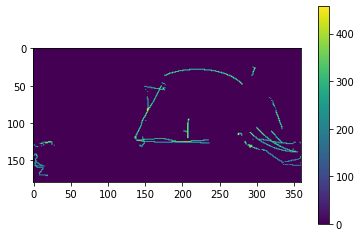

In [83]:
img=plt.imshow(pco2_socat_images[400])
plt.colorbar(img)

(array([2.8000e+01, 8.2000e+01, 1.6100e+02, 2.4500e+02, 3.5300e+02,
        3.6800e+02, 4.6800e+02, 6.0100e+02, 7.5100e+02, 1.0500e+03,
        1.6100e+03, 1.7390e+03, 2.2310e+03, 2.9930e+03, 4.1920e+03,
        6.5880e+03, 9.4140e+03, 1.3799e+04, 1.7676e+04, 2.2718e+04,
        2.8125e+04, 2.8994e+04, 2.6378e+04, 2.2326e+04, 1.8145e+04,
        1.3486e+04, 7.9840e+03, 4.1330e+03, 1.9540e+03, 9.7600e+02,
        3.8500e+02, 2.0700e+02, 9.8000e+01, 5.1000e+01, 2.4000e+01,
        2.5000e+01, 4.0000e+00, 1.0000e+01, 4.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([125.68910217, 137.38035553, 149.07160889, 160.76286224,
        172.4541156 , 184.14536896, 195.83662231, 207.52787567,
        219.21912903, 230.91038239, 242.60163574, 254.2928891 ,
        265.98414246, 277.67539581, 289.36664917, 301.05790253,
        312.74915588, 324.44040924, 336.1316626 , 347.82291595

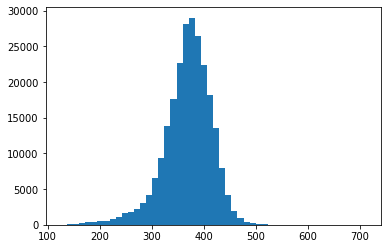

In [84]:
pco2_socat_non = pco2_socat_images[pco2_socat_images!=0]

plt.hist(pco2_socat_non,bins=50)

In [86]:
np.min(pco2_socat_images), np.max(pco2_socat_images)

(0.0, 710.2517700195312)

In [87]:
np.min(pco2.pCO2_socat.data),np.max(pco2.pCO2_socat.data)

(0.0, 710.2517700195312)